In [86]:
import os
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# Set the Kaggle API configuration directory to a writable location
os.environ['KAGGLE_CONFIG_DIR'] = './'

In [88]:
from kaggle.api.kaggle_api_extended import KaggleApi
from sqlalchemy import create_engine

In [89]:
# Kaggle dataset URL
hepatitis_c_url = 'davidechicco/hepatitis-c-ehrs-from-japan'
arterial_disease_url = 'davidechicco/arterial-disease-and-ibd-ehrs-from-france'
chronic_kidney_disease_url = 'davidechicco/chronic-kidney-disease-ehrs-abu-dhabi'

In [90]:
# Directory to download and extract the dataset
downloadDir = '../data/raw'

In [91]:
# SQLite database file
dbFile = '../data/Correlation Analysis of Health Datasets.sqlite'

In [92]:
api = KaggleApi()
api.authenticate()

# Create download directory if it doesn't exist
if not os.path.exists(downloadDir):
    os.makedirs(downloadDir)

api.dataset_download_files(hepatitis_c_url, path=downloadDir, unzip=True)
api.dataset_download_files(arterial_disease_url, path=downloadDir, unzip=True)
api.dataset_download_files(chronic_kidney_disease_url, path=downloadDir, unzip=True)

In [93]:
# Load datasets into pandas DataFrames
ckd_df = pd.read_csv(downloadDir + "/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv")
hepatitis_c_df = pd.read_csv(downloadDir + "/hepatitis_C_EHRs_Japan.csv")
arterial_disease_ibd_df = pd.read_csv(downloadDir + "/arterial_disease_and_IBD_EHRs_from_France.csv")

In [94]:
print("Chronic Kidney Disease (CKD) Dataset:")
display(ckd_df.head())

Chronic Kidney Disease (CKD) Dataset:


,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.8,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.4,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.4,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.1,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.0,70.0,79.7,132,63,31,105,0,9


In [95]:
print("\nHepatitis C Dataset:")
display(hepatitis_c_df.head())


Hepatitis C Dataset:


,cirrhosis,age,sex,cholesterol,triglyceride,HDL,LDL,PathDiagNum,BMI,ALT,AST,glucose,serogroup01
0,1,63,1,103,147,35,38.6,1,20.0,27,35,117,0.0
1,0,68,2,141,95,38,84,1,23.1,78,74,98,0.0
2,1,79,1,143,71,60,68.8,1,21.3,44,40,95,0.0
3,1,52,1,126,64,39,74.2,1,34.0,18,26,101,0.0
4,1,77,2,126,49,41,75.2,1,25.7,106,97,128,0.0


In [96]:
print("\nArterial Disease and IBD Dataset:")
display(arterial_disease_ibd_df.head())


Arterial Disease and IBD Dataset:


,smoker,arterial_hypertension,diabetes,dyslipidemia,CTC_1_0to20mgperday_2_over20mg,immunossupressants,TNFi,meanCRP_over_5_in1y,meanCRP_over_5_in3y,Clinical_activity,sex_0female_1male,arterial_event,event_type_0ACS_1stroke
0,1,1,0,0,0,1,0,1,1,0,0,1,1.0
1,1,0,0,0,0,1,1,1,1,0,0,0,NaN
2,1,1,0,0,1,1,1,0,0,0,0,0,NaN
3,0,1,0,0,0,0,0,1,0,0,1,1,0.0
4,1,0,1,0,1,0,0,1,1,0,1,0,NaN


In [97]:
# Display basic information about the datasets
print("Chronic Kidney Disease (CKD) Dataset:")
display(ckd_df.info())

print("\nHepatitis C Dataset:")
display(hepatitis_c_df.info())

print("\nArterial Disease and IBD Dataset:")
display(arterial_disease_ibd_df.info())

Chronic Kidney Disease (CKD) Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  CreatinineBaseline   491 non-null    float64
 15  eG

None


Hepatitis C Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cirrhosis     123 non-null    int64  
 1   age           123 non-null    int64  
 2   sex           123 non-null    int64  
 3   cholesterol   123 non-null    int64  
 4   triglyceride  123 non-null    int64  
 5   HDL           123 non-null    object 
 6   LDL           123 non-null    object 
 7   PathDiagNum   123 non-null    int64  
 8   BMI           123 non-null    float64
 9   ALT           123 non-null    int64  
 10  AST           123 non-null    int64  
 11  glucose       123 non-null    int64  
 12  serogroup01   98 non-null     float64
dtypes: float64(2), int64(9), object(2)
memory usage: 12.6+ KB


None


Arterial Disease and IBD Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   smoker                          90 non-null     int64  
 1   arterial_hypertension           90 non-null     int64  
 2   diabetes                        90 non-null     int64  
 3   dyslipidemia                    90 non-null     int64  
 4   CTC_1_0to20mgperday_2_over20mg  90 non-null     int64  
 5   immunossupressants              90 non-null     int64  
 6   TNFi                            90 non-null     int64  
 7   meanCRP_over_5_in1y             90 non-null     int64  
 8   meanCRP_over_5_in3y             90 non-null     int64  
 9   Clinical_activity               90 non-null     int64  
 10  sex_0female_1male               90 non-null     int64  
 11  arterial_event                  90 non-null     int64  
 12  eve

None

In [98]:
# Display summary statistics
print("Summary Statistics - CKD Dataset:")
display(ckd_df.describe())

print("\nSummary Statistics - Hepatitis C Dataset:")
display(hepatitis_c_df.describe())

print("\nSummary Statistics - Arterial Disease and IBD Dataset:")
display(arterial_disease_ibd_df.describe())

Summary Statistics - CKD Dataset:


,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.509165,53.203666,0.437882,0.091650,0.059063,0.152749,0.682281,0.645621,0.505092,0.551935,...,0.446029,4.978574,67.856823,98.116090,131.374745,76.871690,30.183299,83.065173,0.114053,6.940937
std,0.500426,13.821282,0.496632,0.288825,0.235983,0.360113,0.466064,0.478812,0.500484,0.497803,...,0.497586,1.096702,17.918627,18.503267,15.692650,10.711134,6.236742,26.011140,0.318200,2.201710
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.230000,6.000000,60.000000,92.000000,41.000000,13.000000,0.000000,0.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.200000,55.000000,86.400000,121.000000,69.000000,26.000000,77.000000,0.000000,6.000000
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,5.000000,66.000000,98.100000,131.000000,77.000000,30.000000,93.000000,0.000000,8.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.770000,78.500000,109.500000,141.000000,83.000000,33.000000,100.000000,0.000000,8.000000
max,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.300000,123.000000,242.600000,180.000000,112.000000,57.000000,111.000000,1.000000,9.000000



Summary Statistics - Hepatitis C Dataset:


,cirrhosis,age,sex,cholesterol,triglyceride,PathDiagNum,BMI,ALT,AST,glucose,serogroup01
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,98.000000
mean,0.674797,69.577236,1.390244,158.983740,94.650407,0.845528,23.122195,57.934959,59.682927,124.894309,0.153061
std,0.470367,7.824937,0.489800,95.856534,44.236507,0.362878,2.984334,37.274731,30.065043,44.256298,0.361898
min,0.000000,50.000000,1.000000,86.000000,31.000000,0.000000,16.300000,9.000000,15.000000,72.000000,0.000000
25%,0.000000,63.000000,1.000000,126.000000,64.500000,1.000000,21.200000,32.000000,39.000000,96.000000,0.000000
50%,1.000000,70.000000,1.000000,146.000000,86.000000,1.000000,23.000000,45.000000,55.000000,113.000000,0.000000
75%,1.000000,76.000000,2.000000,170.000000,115.500000,1.000000,24.600000,75.500000,77.500000,143.500000,0.000000
max,1.000000,86.000000,2.000000,1151.000000,367.000000,1.000000,34.000000,225.000000,179.000000,321.000000,1.000000



Summary Statistics - Arterial Disease and IBD Dataset:


,smoker,arterial_hypertension,diabetes,dyslipidemia,CTC_1_0to20mgperday_2_over20mg,immunossupressants,TNFi,meanCRP_over_5_in1y,meanCRP_over_5_in3y,Clinical_activity,sex_0female_1male,arterial_event,event_type_0ACS_1stroke
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,30.000000
mean,0.422222,0.344444,0.100000,0.200000,0.300000,0.288889,0.066667,0.433333,0.444444,0.266667,0.588889,0.333333,0.266667
std,0.496681,0.477849,0.301681,0.402241,0.507251,0.455785,0.250841,0.498312,0.499688,0.444694,0.494792,0.474045,0.449776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
# Handle missing values and perform data cleaning as needed
# Example: Drop rows with missing values for simplicity
ckd_df_cleaned = ckd_df.dropna()
hepatitis_c_df_cleaned = hepatitis_c_df.dropna()
arterial_disease_ibd_df_cleaned = arterial_disease_ibd_df.dropna()

In [109]:
# Rename columns to make them more readable
arterial_disease_ibd_df_cleaned.rename(columns={'sex_0female_1male': 'sex'}, inplace=True)

C:\Users\faraz\AppData\Local\Temp\ipykernel_32120\1087205525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arterial_disease_ibd_df_cleaned.rename(columns={'sex_0female_1male': 'sex'}, inplace=True)


In [110]:
# Assuming 'Sex' column is in the CKD dataset
hepatitis_c_df_cleaned['sex'] = hepatitis_c_df_cleaned['sex'].replace(2, 0)

# Display the updated DataFrame
print("Updated CKD Dataset:")
display(hepatitis_c_df_cleaned.head())

Updated CKD Dataset:


C:\Users\faraz\AppData\Local\Temp\ipykernel_32120\700406698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hepatitis_c_df_cleaned['sex'] = hepatitis_c_df_cleaned['sex'].replace(2, 0)


,cirrhosis,age,sex,cholesterol,triglyceride,HDL,LDL,PathDiagNum,BMI,ALT,AST,glucose,serogroup01
0,1,63,1,103,147,35,38.6,1,20.0,27,35,117,0.0
1,0,68,0,141,95,38,84,1,23.1,78,74,98,0.0
2,1,79,1,143,71,60,68.8,1,21.3,44,40,95,0.0
3,1,52,1,126,64,39,74.2,1,34.0,18,26,101,0.0
4,1,77,0,126,49,41,75.2,1,25.7,106,97,128,0.0


In [111]:
 # Create SQLite engine
engine = create_engine(f'sqlite:///{dbFile}')

# Transfer the preprocessed data to SQLite
ckd_df_cleaned.to_sql('chronic_kidney_disease', engine, index=False, if_exists='replace')
hepatitis_c_df_cleaned.to_sql('hepatitis_c', engine, index=False, if_exists='replace')
arterial_disease_ibd_df_cleaned.to_sql('arterial_disease', engine, index=False, if_exists='replace')

30

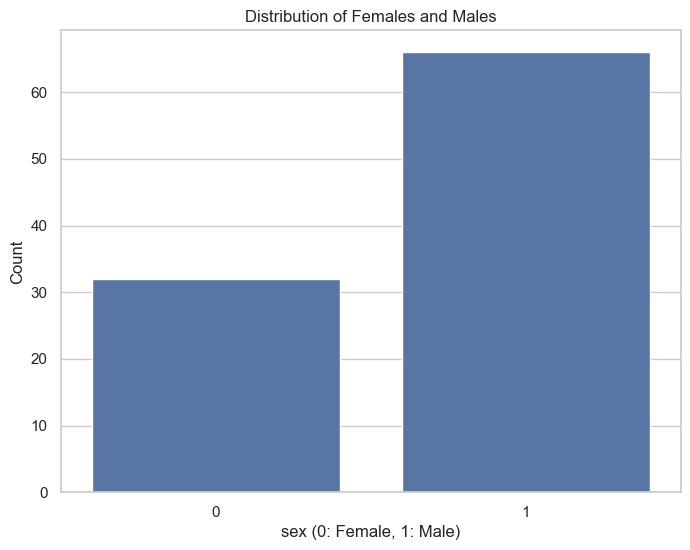

In [105]:
# Assuming 'Sex' column is in the CKD dataset
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Count plot for 'Sex' column
sns.countplot(x=hepatitis_c_df_cleaned['sex'])

# Adding labels and title
plt.xlabel('sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.title('Distribution of Females and Males')

# Show the plot
plt.show()

In [106]:
#display(arterial_disease_ibd_df_cleaned.head())

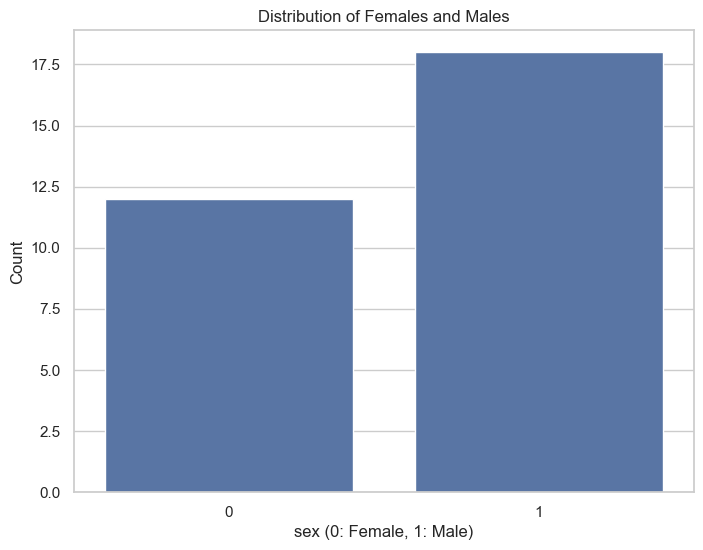

In [108]:
# Assuming 'Sex' column is in the CKD dataset
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Count plot for 'Sex' column
sns.countplot(x=arterial_disease_ibd_df_cleaned['sex_0female_1male'])

# Adding labels and title
plt.xlabel('sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.title('Distribution of Females and Males')

# Show the plot
plt.show()

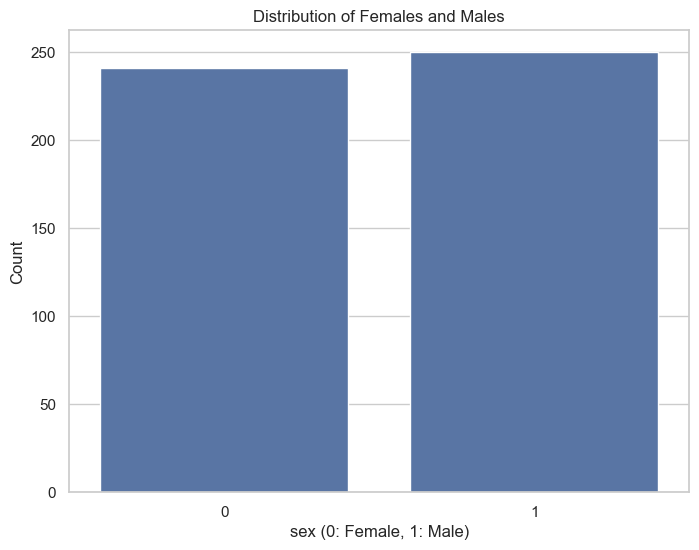

In [112]:
# Assuming 'Sex' column is in the CKD dataset
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Count plot for 'Sex' column
sns.countplot(x=ckd_df_cleaned['Sex'])

# Adding labels and title
plt.xlabel('sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.title('Distribution of Females and Males')

# Show the plot
plt.show()

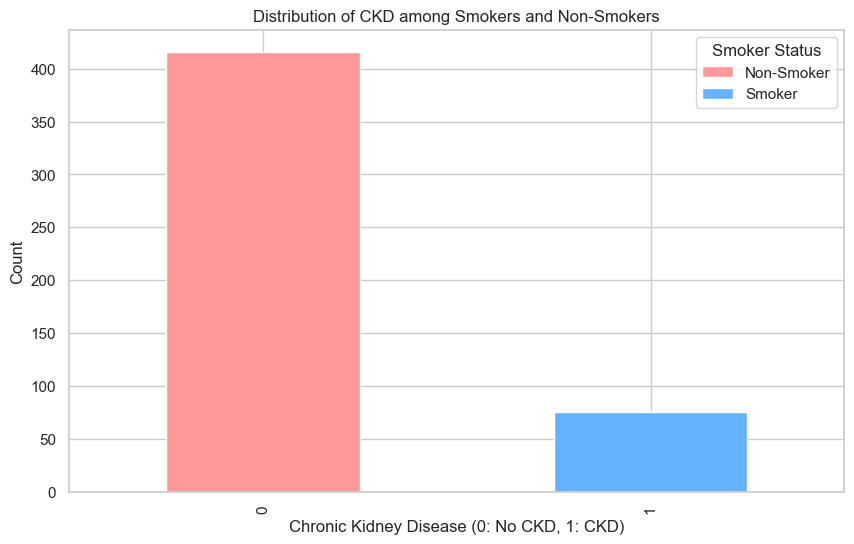

In [116]:
# Assuming 'smoker', 'CKD', 'HepatitisC', 'ArterialDiseaseIBD' columns are in the CKD dataset
# You may need to adjust column names based on your dataset

# Create a cross-tabulation table
cross_tab = pd.crosstab(ckd_df_cleaned['HistorySmoking'], ckd_df_cleaned['HistorySmoking'])

# Visualize the distribution using a stacked bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

cross_tab.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], ax=plt.gca())

# Adding labels and title
plt.xlabel('Chronic Kidney Disease (0: No CKD, 1: CKD)')
plt.ylabel('Count')
plt.title('Distribution of CKD among Smokers and Non-Smokers')

# Show the plot
plt.legend(title='Smoker Status', labels=['Non-Smoker', 'Smoker'])
plt.show()

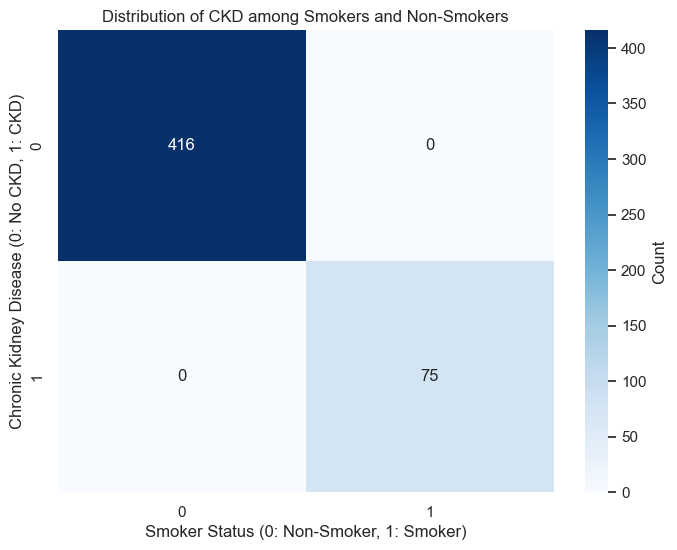

In [117]:
# Assuming 'smoker', 'CKD', 'HepatitisC', 'ArterialDiseaseIBD' columns are in the CKD dataset
# You may need to adjust column names based on your dataset

# Create a correlation matrix
correlation_matrix = ckd_df_cleaned[['HistorySmoking', 'CKD', 'HepatitisC', 'ArterialDiseaseIBD']].corr()

# Visualize the correlation matrix using a heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar_kws={'label': 'Correlation'})

# Adding title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()
